In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# kNN import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#DBSCAN
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

## Reading in the cleaned dataset.

In [15]:
spot = pd.read_csv('final.csv')

## Using Linear Regression to find coefficients.

In [16]:
X = spot[['bpm', 'dance', 'valence', 'popularity', 'dur']]
y = spot['energy']

In [17]:
X.shape

(1288, 5)

In [18]:
y.shape

(1288,)

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X, y)

LinearRegression()

In [21]:
# Take a peek at the model coefficient and intercept
print(f'Model intercept: {lr.intercept_}')
print(f'Model Coefficient: {lr.coef_[0]}')

Model intercept: -44.79799956002157
Model Coefficient: 0.1383934689984302


In [22]:
pd.DataFrame(lr.coef_, index = X.columns)

,0
bpm,0.138393
dance,0.500889
valence,0.400533
popularity,0.279964
dur,0.070473


***For every 1 unit increase in X, we expect energy to increase by Bi holding all else constant.***

+ Holding energy constant, for every 1 unit increase in danceability, we will see a .5 increase in energy. 

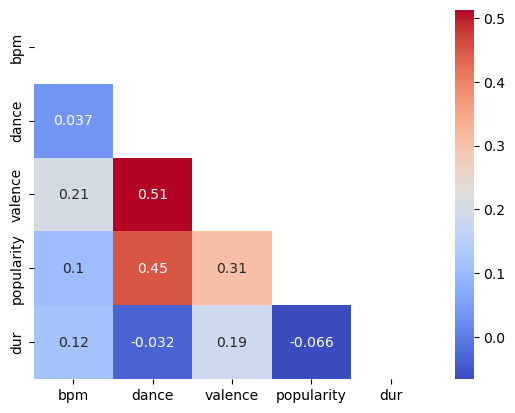

In [23]:
X.corr()

mask = np.zeros_like(X.corr())

mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(),
           cmap = 'coolwarm',
           mask = mask,
           annot = True);

## K Means Clustering

In [29]:
kmeans.inertia_

1124683.2451037238

# Silhouette Score

In [68]:
#Create a new X with highest coefficient features.
X = spot[['dance','energy']]
# Define the number of clusters (you can adjust this)
num_clusters = 3
# Create a K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
# Fit the model.
kmeans.fit(X)
# Get the centroids.
centroids = kmeans.cluster_centers_
# Get cluster labels for each data point
labels = kmeans.labels_

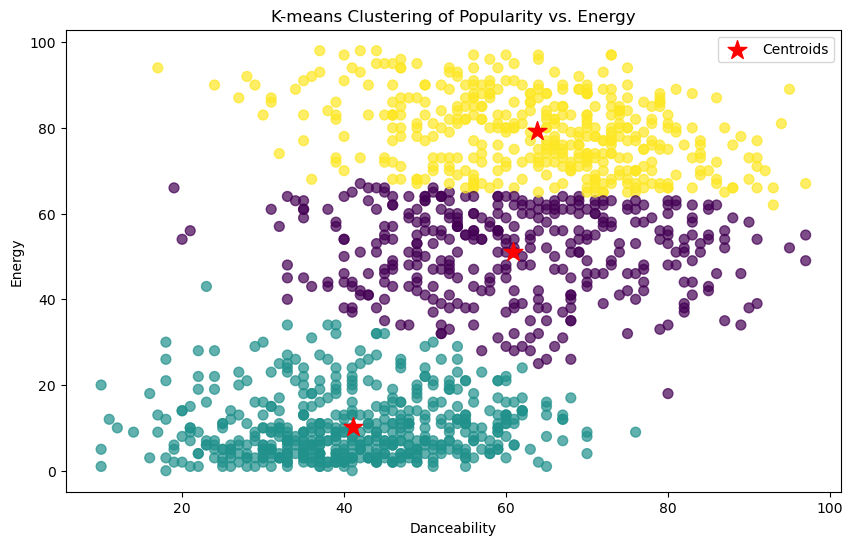

In [37]:
# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['dance'], X['energy'], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plot the centroids as red stars
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')

# Label axes and title
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-means Clustering of Popularity vs. Energy')
plt.legend()
plt.show();

In [40]:
kmeans.inertia_

332893.9850933291

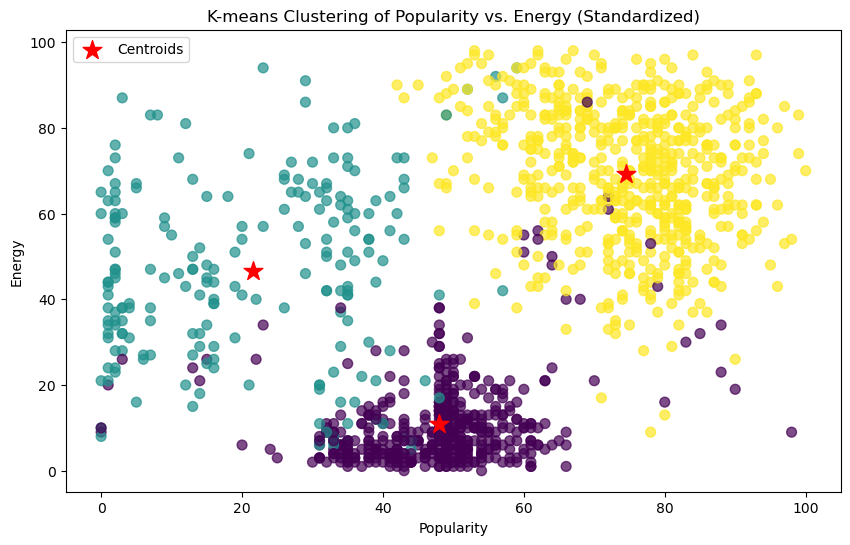

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'spot' with the relevant columns: popularity, dance, valence, and energy
X = spot[['popularity', 'dance', 'valence', 'energy']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (you can adjust this)
num_clusters = 3

# Create a K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to your scaled data
kmeans.fit(X_scaled)

# Get the cluster centers (centroids)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Get cluster labels for each data point
labels = kmeans.labels_

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['popularity'], X['energy'], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plot the centroids as red stars
plt.scatter(centroids[:, 0], centroids[:, 3], marker='*', c='red', s=200, label='Centroids')

# Label axes and title
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('K-means Clustering of Popularity vs. Energy (Standardized)')
plt.legend()
plt.show()


In [70]:
kmeans.inertia_

2099.948231877301

In [71]:
silhouette_score(X_scaled, kmeans.labels_)

0.3993716611637207

In [74]:
k_values = range(1,11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


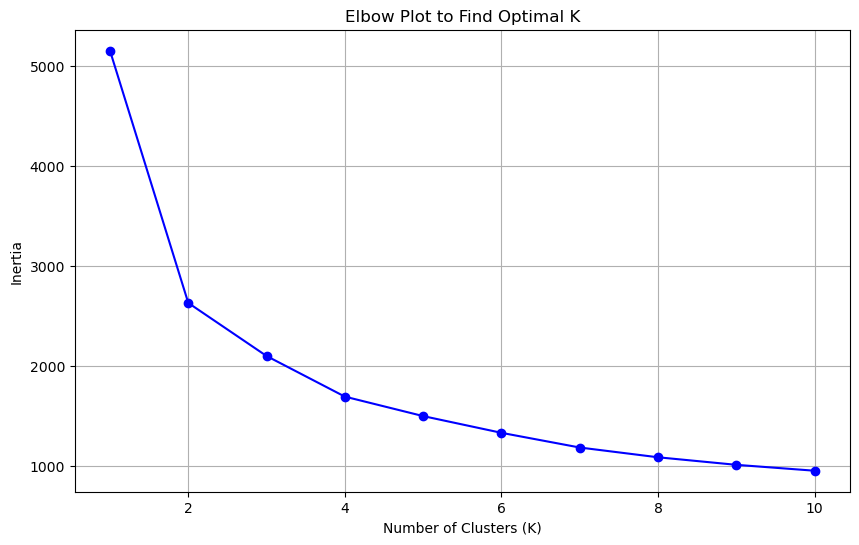

In [75]:
# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot to Find Optimal K')
plt.grid(True)
plt.show()

In [78]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state = 12)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
silhouette_list

[0.4323401280342942,
 0.3993716611637207,
 0.35023542096288485,
 0.35871278092452474,
 0.2959439185562263,
 0.28600346653925046,
 0.29460114900629064,
 0.27336306085095374,
 0.27383830542364207]

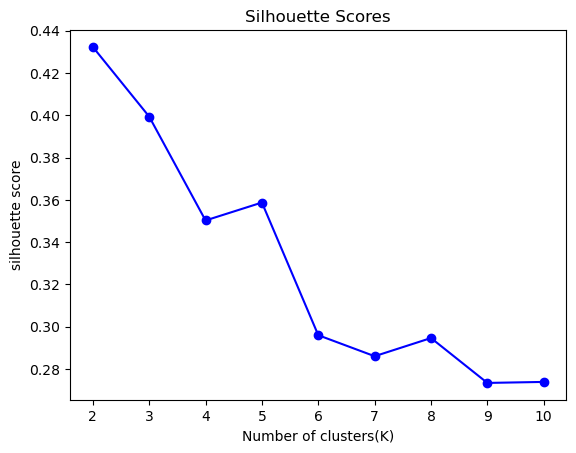

In [81]:
plt.plot(range(2, 11), silhouette_list, marker = 'o', color = 'blue')
plt.xlabel('Number of clusters(K)')
plt.ylabel('silhouette score')
plt.title('Silhouette Scores');

## DBSCAN

In [83]:
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [85]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [86]:
silhouette_score(X_scaled, dbscan.labels_)

0.09701955718472416

In [88]:
spot['cluster'] = dbscan.labels_

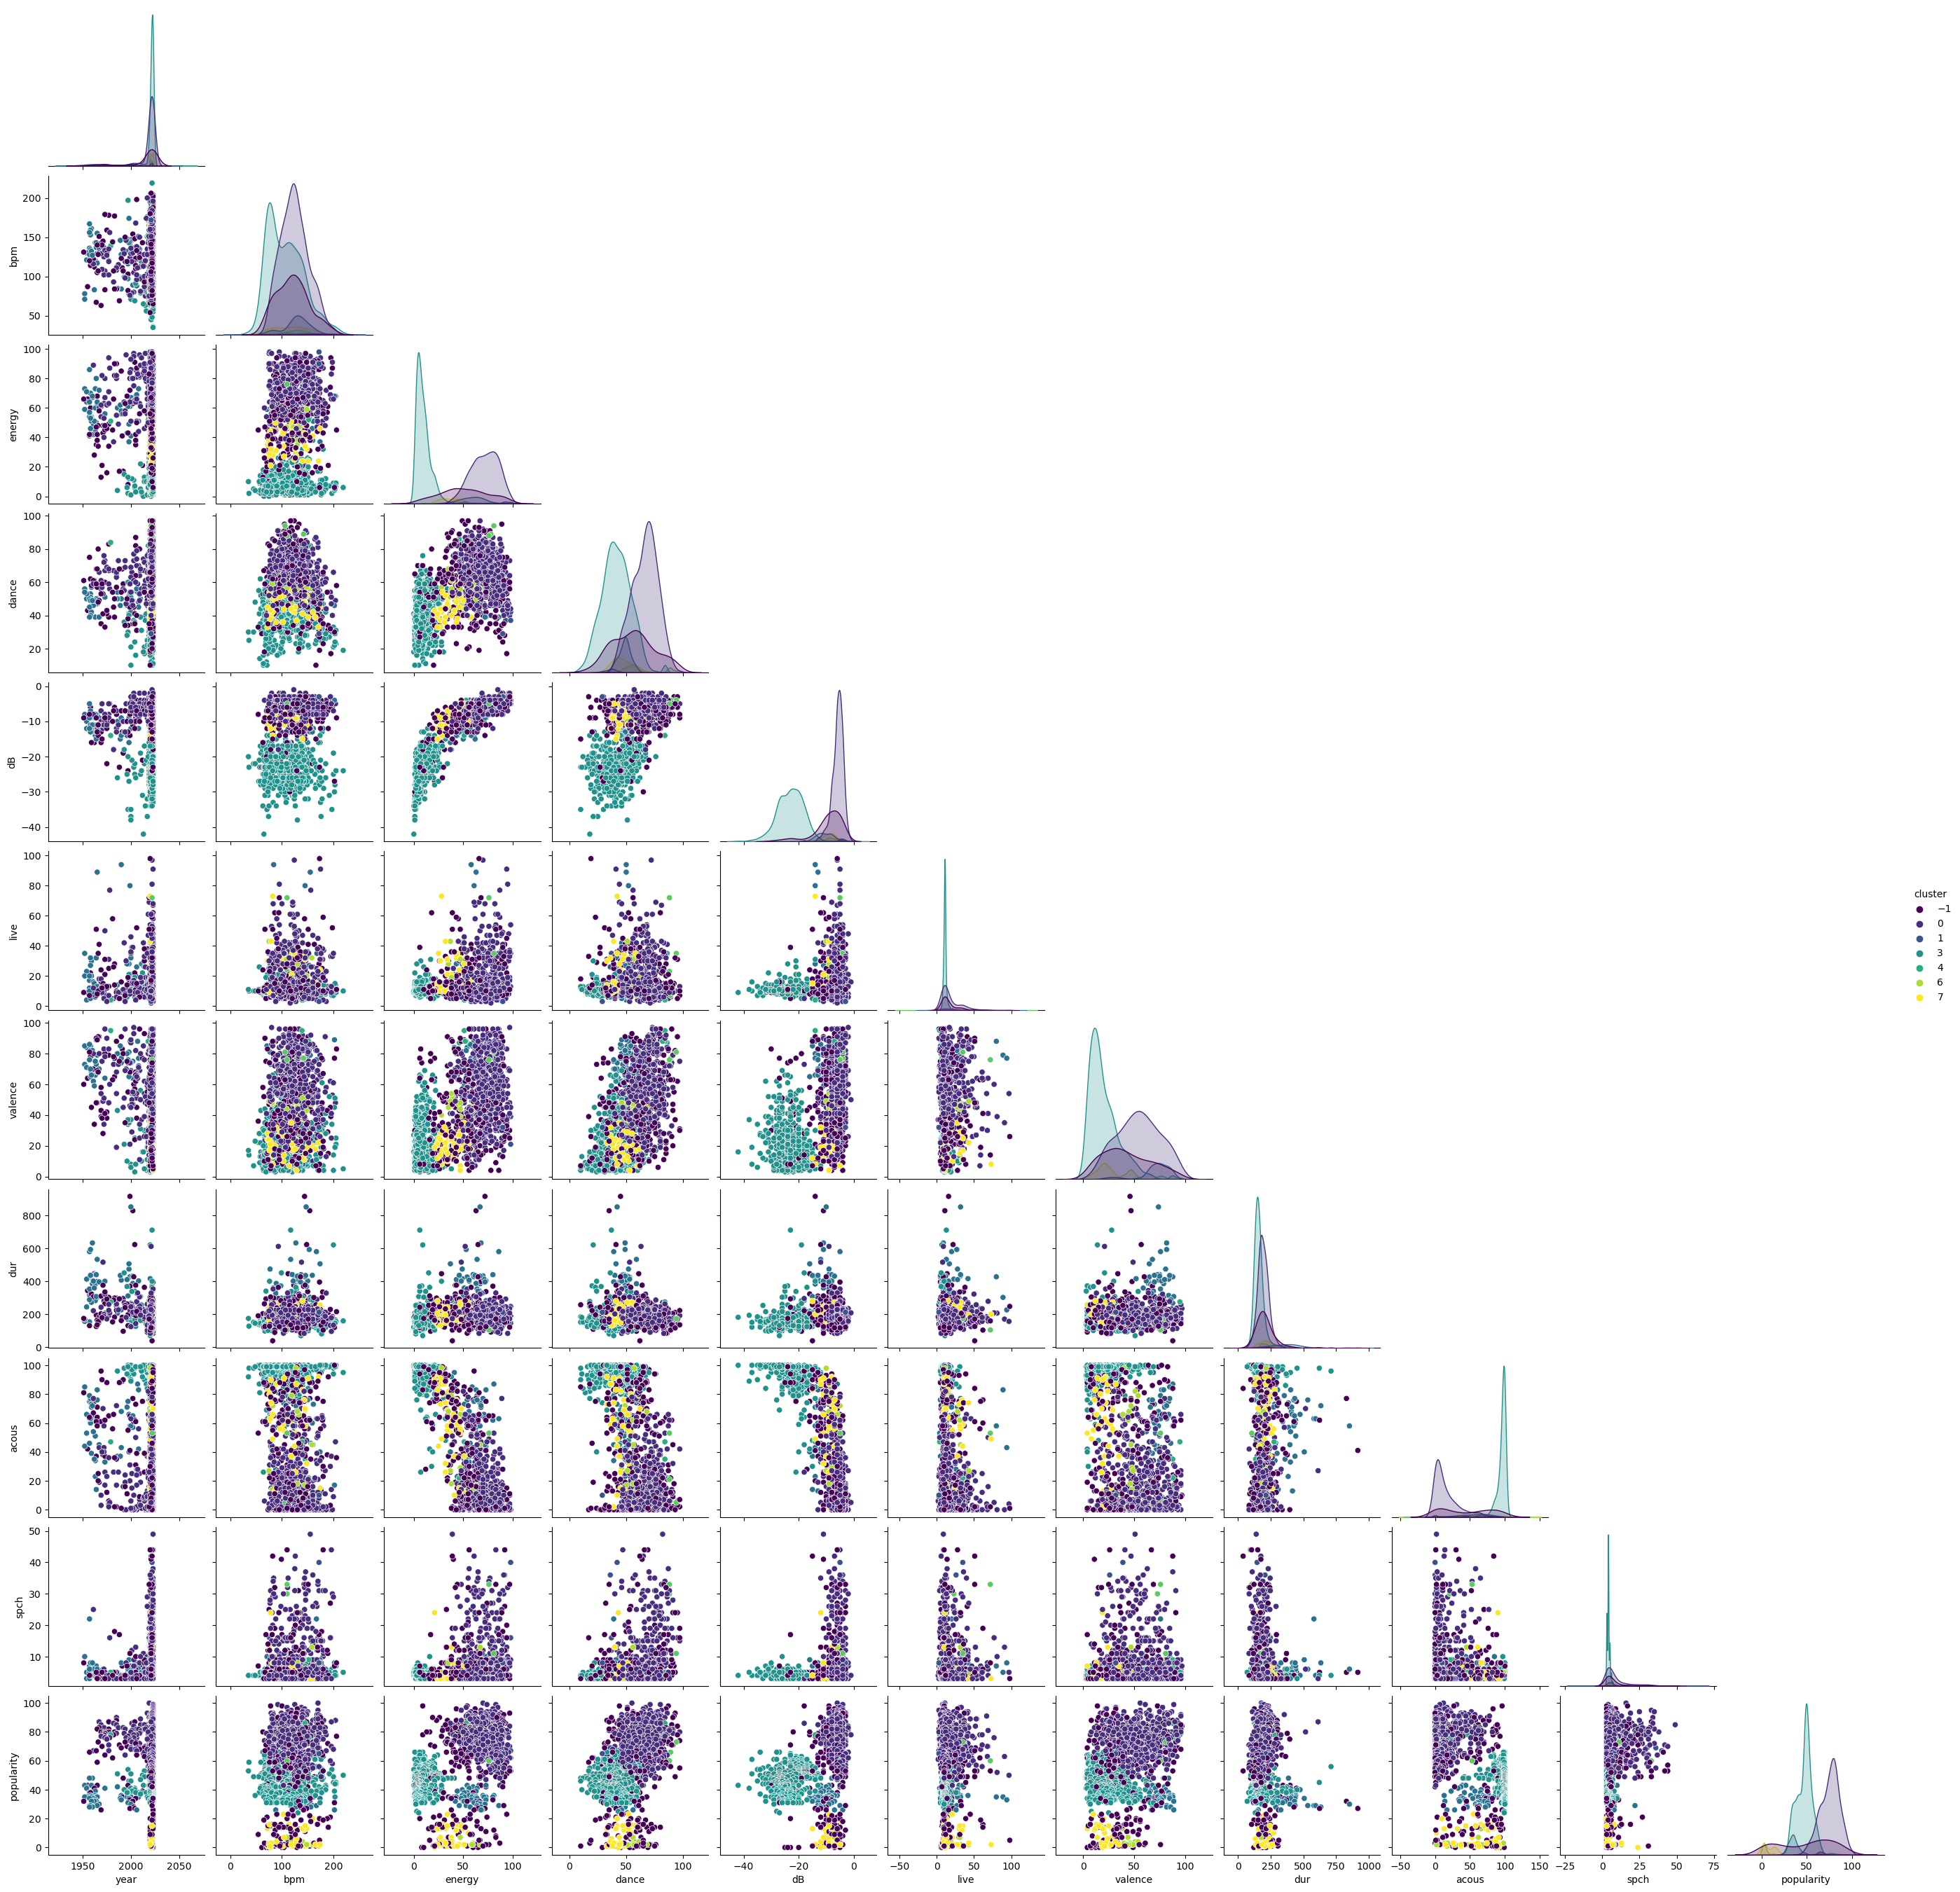

In [90]:
sns.pairplot(spot, hue = 'cluster', corner = True, palette = 'viridis');

In [91]:
spot.cluster.value_counts(normalize = True)

 0    0.365683
 3    0.365683
-1    0.181677
 2    0.038043
 7    0.027950
 6    0.010870
 1    0.003882
 4    0.003106
 5    0.003106
Name: cluster, dtype: float64

## Adjusting Epsilon

In [105]:
scan = pd.DataFrame(spot, columns = ['popularity', 'valence', 'dance', 'energy'])

In [109]:
X_scaled = scaler.fit_transform(scan)

In [189]:
# Adjusting epsilon values
dbscan = DBSCAN(eps = .62)
dbscan.fit(X_scaled)
pd.Series(dbscan.labels_).unique()

array([ 0, -1,  1,  2])

In [190]:
silhouette_score(X_scaled, dbscan.labels_)

0.34776164457378217

In [192]:
spot['db cluster'] = dbscan.labels_

In [193]:
spot['db cluster'].value_counts()

 0    642
 1    482
 2     92
-1     72
Name: db cluster, dtype: int64

In [194]:
spot['db cluster'].value_counts(normalize = True)

 0    0.498447
 1    0.374224
 2    0.071429
-1    0.055901
Name: db cluster, dtype: float64

In [195]:
clust_0 = spot.loc[spot['db cluster'] == 0]
clust_1 = spot.loc[spot['db cluster'] == 1]

In [196]:
spot.groupby('db cluster').mean().T[[0, 1]]

db cluster,0,1
year,2013.593458,2020.823651
bpm,125.263240,107.502075
energy,68.404984,9.358921
dance,63.906542,41.190871
dB,-6.557632,-23.053942
live,18.852025,11.126556
valence,55.023364,20.346473
dur,210.677570,163.085062
acous,21.384735,94.514523
spch,9.093458,4.064315


In [197]:
spot.groupby('db cluster').agg(['mean', 'std']).T[[0,1]]

db cluster                 0            1
year       mean  2013.593458  2020.823651
           std     17.636426     5.169077
bpm        mean   125.263240   107.502075
           std     27.685680    34.822165
energy     mean    68.404984     9.358921
           std     15.573323     6.939433
dance      mean    63.906542    41.190871
           std     13.915636    12.178031
dB         mean    -6.557632   -23.053942
           std      2.707927     4.651380
live       mean    18.852025    11.126556
           std     14.635080     2.871206
valence    mean    55.023364    20.346473
           std     22.149071    14.363063
dur        mean   210.677570   163.085062
           std     87.386925    54.788414
acous      mean    21.384735    94.514523
           std     23.576806     9.435898
spch       mean     9.093458     4.064315
           std      8.500564     0.915342
popularity mean    71.113707    46.912863
           std     15.605146     8.197959
cluster    mean     0.052960     2.900415
           std      0.865529     0.623883

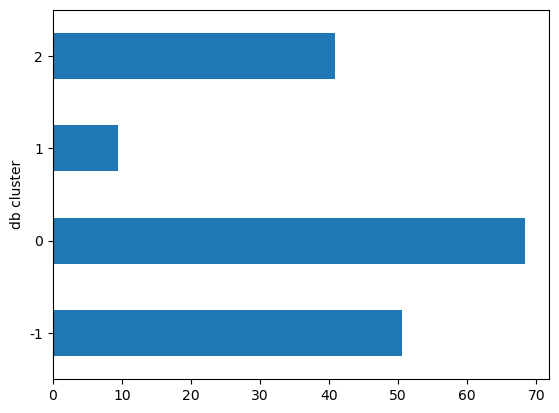

In [201]:
spot.groupby('db cluster').mean()['energy'].plot(kind = 'barh');